<a href="https://colab.research.google.com/github/kkningoo/ML-Model-for-drug-discovery/blob/main/DrugDesign2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML MODEL BUILDING**

## **Finding Fingerprint descriptors**

Just like each individuals have a unique fingerprint, these chemical compounds also have a fingerprint based on their chemical structure. This programme will calculate the fingerprint descriptors (in binary form) of the chemical compounds we have stored in the latest CSV file.

### **Downloading PaDEL Descriptor**

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2024-06-26 06:15:43--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-06-26 06:15:43--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  87.9MB/s    in 0.3s    

2024-06-26 06:15:44 (87.9 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2024-06-26 06:15:44--  https://githu

In [ ]:
# unzipping the file
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

### **Importing the csv file data**

Firstly, you have to upload the csv file saved from previous notebook in this notebook. Go to the file icon and select the upload option. Thereafter, we can import it as a dataframe.

In [ ]:
import pandas as pd
df = pd.read_csv('bioactivity_data_final_pIC50.csv')
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,5.698970
...,...,...,...,...,...,...,...,...
81,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,4.675718
82,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,3.644548
83,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,4.412289
84,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,4.841638


In [ ]:
# selecting only the molecule_cchembl_id and canonical_smiles columns
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df[selection]

#saving as a .smi file without the header row and index column
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)
df_selection

,canonical_smiles,molecule_chembl_id
0,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,CHEMBL187579
1,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,CHEMBL188487
2,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,CHEMBL185698
3,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,CHEMBL426082
4,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],CHEMBL187717
...,...,...
81,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,CHEMBL2146517
82,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,CHEMBL187460
83,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,CHEMBL363535
84,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,CHEMBL227075


In [ ]:
# displaying the smi file
! cat molecule.smi

Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21	CHEMBL187579
O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21	CHEMBL188487
O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21	CHEMBL185698
O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21	CHEMBL426082
O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-]	CHEMBL187717
O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21	CHEMBL365134
O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(F)cc21	CHEMBL187598
O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21	CHEMBL190743
O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21	CHEMBL365469
O=C1C(=O)N(C/C=C/c2cc3ccccc3s2)c2ccc(I)cc21	CHEMBL188983
O=C(Nc1ccc(Cl)cc1)c1ccc(CN2C(=O)C(=O)c3cc(I)ccc32)s1	CHEMBL191575
O=C1C(=O)N(Cc2ccc(C(=O)N3CCCCC3)s2)c2ccc(I)cc21	CHEMBL370923
CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H](CC(=O)[C@@H](NC(=O)c1cc(C)on1)C(C)C)Cc1ccccc1	CHEMBL194398
CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H](CC=C(C)C)CC(=O)[C@@H](NC(=O)c1cc(C)on1)C(C)C	CHEMBL196635
CCCCN1C(=O)C(=O)c2cc(I)ccc21	CHEMBL209287
NC(=O)c1ccc2c(c1)C(=O)C(=O)N2Cc1ccc2ccccc2c1	CHEMBL358279
NC(=O)c1ccc2c(c1)C(=O)C(=O)

### **Calculate PaDEL descriptors**

In [ ]:
# what the padel.sh will do - remove salt, standardise nitro, calculate fingerprints in type of PubChem Fingerprint.
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
# processing each molecule
! bash padel.sh

Processing CHEMBL187579 in molecule.smi (1/86). 
Processing CHEMBL188487 in molecule.smi (2/86). 
Processing CHEMBL185698 in molecule.smi (3/86). Average speed: 1.02 s/mol.
Processing CHEMBL426082 in molecule.smi (4/86). Average speed: 1.02 s/mol.
Processing CHEMBL187717 in molecule.smi (5/86). Average speed: 0.97 s/mol.
Processing CHEMBL365134 in molecule.smi (6/86). Average speed: 0.73 s/mol.
Processing CHEMBL187598 in molecule.smi (7/86). Average speed: 0.75 s/mol.
Processing CHEMBL190743 in molecule.smi (8/86). Average speed: 0.64 s/mol.
Processing CHEMBL365469 in molecule.smi (9/86). Average speed: 0.64 s/mol.
Processing CHEMBL188983 in molecule.smi (10/86). Average speed: 0.58 s/mol.
Processing CHEMBL191575 in molecule.smi (11/86). Average speed: 0.62 s/mol.
Processing CHEMBL370923 in molecule.smi (12/86). Average speed: 0.56 s/mol.
Processing CHEMBL196635 in molecule.smi (14/86). Average speed: 0.59 s/mol.
Processing CHEMBL194398 in molecule.smi (13/86). Average speed: 0.58 s/mo

The output is directly saved in a csv file. Go to the File icon and check for `descriptors_output.csv`.

# **Model Building**

Each of the pubchem fingerprints represents a specific segment of the chemical structure of the compound. This ML model aims to relate the chemical structure, ie these fingerprints to the inhibition activity (pIC50)  of the compound.

The aim is to predict the pIC50 value of the compound based on its structural fingerprints.

### **Importing the required libraries**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

### **X and Y data matrices**

#### **X matrix**

 It will contain the molecular descriptors ie the pubchem fingerprints of the molecules as calculated above.

In [ ]:
df_X = pd.read_csv('descriptors_output.csv')
df_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL187579,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL188487,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL185698,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL426082,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL187717,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,CHEMBL2146517,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82,CHEMBL187460,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83,CHEMBL227075,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84,CHEMBL363535,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


882 columns signify that there are 881 (leaving the `Name` column) pubchem fingerprints of each molecule. Now, we do not want the `Name`. So, we drop that column.

In [ ]:
df_X = df_X.drop(columns=['Name'])
df_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
82,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
83,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
84,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


881 is a lot of fingerprints. We want to remove the less important fingerprints to make it simpler and easier.

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
df_X = selection.fit_transform(df_X)
df_X.shape

(86, 185)

From 881, the number of fingerprints reduced to 185.

#### **Y matrix**

This will contain the pIC50 values of the compounds.

In [ ]:
df_Y=df['pIC50']
df_Y

0     5.142668
1     5.026872
2     4.869666
3     4.882397
4     5.698970
        ...   
81    4.675718
82    3.644548
83    4.412289
84    4.841638
85    4.675718
Name: pIC50, Length: 86, dtype: float64

## **Split the datasets for Training and Testing - 80/20**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_Y, test_size=0.2)

Checking the number of compounds in each:

In [ ]:
X_train.shape, Y_train.shape

((68, 185), (68,))

In [ ]:
X_test.shape, Y_test.shape

((18, 185), (18,))

## **Building a Regression Model using Random Forest Algorithm**

r^2 is the score of the model.
Higher the value of r^2, greater the prediction accuracy of the model.

In [ ]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.40365959914524296

In [ ]:
# predicting the Y(pIC50) value using our model for the test X set
Y_pred = model.predict(X_test)
Y_pred

array([5.09406158, 4.69081187, 5.21695116, 4.07508056, 4.482745  ,
       4.32121441, 5.07764441, 5.35041297, 4.12595988, 3.99474164,
       4.24540001, 4.78785647, 4.61622647, 5.013943  , 4.34651932,
       3.97898369, 4.53449441, 6.65666669])

**WE HAVE SUCCESSFULLY CREATED A ML RANDOM FOREST MODEL FOR THE SELECTED TARGET PROTEIN !!!**

We can now use this model to predict the pIC50 values of different chemical compounds for the given target protein.

## **Scatter Plot of Experimental vs Predicted pIC50 Values**

<function matplotlib.pyplot.show(close=None, block=None)>

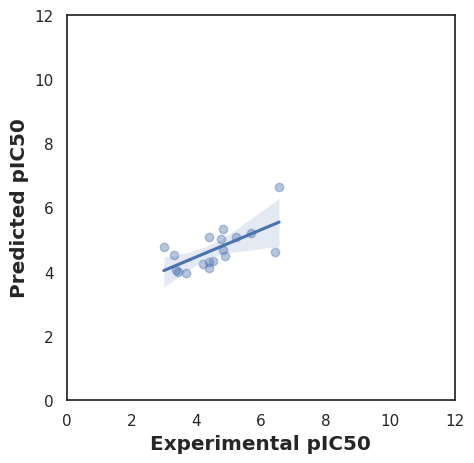

In [ ]:
# comparing the predicted Y values for X_test with the actual Y_test values
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show